In [7]:
import pandas as pd
from collections import Counter
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
import numpy as np

In [44]:
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import seaborn as sns
# Visualisation
def plot_spatial(
    adata, annotation, ax: Axes, spot_size: float, palette=None, title: str = ""
):
    """
    Scatter plot in spatial coordinates.

    Parameters:
        - adata (AnnData): Annotated data object which represents the sample
        - annotation (str): adata.obs column used for grouping
        - ax (Axes): Axes object used for plotting
        - spot_size (int): Size of the dot that represents a cell. We are passing it as a diameter of the spot, while
                the plotting library uses radius therefore it is multiplied by 0.5
        - palette (dict): Dictionary that represents a mapping between annotation categories and colors
        - title (str): Title of the figure

    """
    s = spot_size * 0.5
    data = adata

    ax = sns.scatterplot(
        data=data.obs,
        hue=annotation,
        x=data.obsm["spatial"][:, 0],
        y=data.obsm["spatial"][:, 1],
        ax=ax,
        s=s,
        linewidth=0,
        palette=palette,
        marker=".",
        legend=True
    )
    # ax.invert_yaxis()
    # plt.legend(loc='upper left')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set(yticklabels=[], xticklabels=[])
    ax.set_title(title, fontsize=18, loc='left')
    ax.tick_params(bottom=False, left=False)
    ax.set_aspect("equal")
    sns.despine(bottom=True, left=True, ax=ax)
    plt.savefig('figs/kidney/groudn_truth_kidney.png', dpi=300, bbox_inches='tight')

In [5]:
# adata_st = sc.read_h5ad("../SS200000141TL_B5_pruned_inplace_ctopt.h5ad")
# adata_st = sc.read_h5ad("../E16.5_E1S3_cell_bin_whole_brain_noborderct_unlog1p_pruned_inplace_ctopt.h5ad")
# adata_st = sc.read_h5ad("../mouse_brain_visium_cell2location_pruned_inplace_ctopt.h5ad")
adata_st = sc.read_h5ad("../Puck_191223_19_corr_pruned_inplace_ctopt.h5ad")
adata_st

AnnData object with n_obs × n_vars = 36299 × 21296
    obs: 'author_cell_type', 'ctopt'
    obsm: 'X_spatial', 'probabilities_contrastive', 'spatial'

In [8]:
adata_st.obs["entropy"] = [
            entropy(prow)
            for _, prow in adata_st.obsm["probabilities_contrastive"].iterrows()
        ]

In [12]:
adata_st.obs["entropy"]

cell_id
AAAAAACAACTGCA    0.314087
AAAAAACCACACTA    0.130199
AAAAACCCGGTACT    0.231576
AAAAACCCTCCAGG    0.383488
AAAAAGAGACGAAA    0.434356
                    ...   
TTTTTACAGTGAAA    0.213560
TTTTTCCTTTTATA    0.145600
TTTTTTTTACAGGA    0.242744
TTTTTTTTGCTTTC    0.216039
TTTTTTTTTGGGTC    0.202472
Name: entropy, Length: 36299, dtype: float32

In [13]:
from scipy.stats import entropy
data = pd.DataFrame({
    'type_1': [0.1, 0, 0.9, 0],
    'type_2': [0.2, 0.3, 0.05, 0.4],
    'type_3': [0.4, 0.4, 0.4, 0.4]
})

entropies = data.apply(lambda row: entropy(row))
entropies

type_1    0.325083
type_2    1.211214
type_3    1.386294
dtype: float64

In [62]:
conf = adata_st.obs["ctopt_confidence"].values
conf

array([0.934, 0.978, 0.957, ..., 0.953, 0.959, 0.962], dtype=float32)

In [23]:
adata_st.obs["ctoptt"] = adata_st.obs["ctopt"].astype(str)

In [22]:
adata_st.obs["entropy"].mean()

0.6659061

In [24]:
adata_st.obs["ctoptt"][adata_st.obs["entropy"] > adata_st.obs["entropy"].mean()] = "UNKNOWN"

/tmp/ipykernel_407399/478106000.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata_st.obs["ctoptt"][adata_st.obs["entropy"] > adata_st.obs["entropy"].mean()] = "UNKNOWN"
/tmp/ipykernel_407399/478106000.py:1: SettingWithCopyWarning: 
A

In [39]:
set(adata_st.obs["ctoptt"].values)

{'DCT',
 'Early PT',
 'Endo',
 'IC',
 'Macro',
 'NANA',
 'NP',
 'PC',
 'PST',
 'Podo',
 'Stroma 1',
 'Stroma 2'}

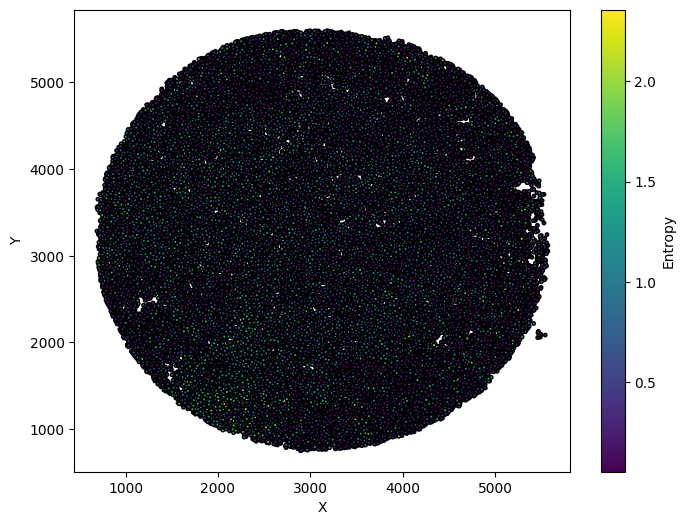

In [21]:


# Normalize the 'value' column for the colorma

# Create a scatter plot with continuous color mapping
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    adata_st.obsm["spatial"][:, 0],adata_st.obsm["spatial"][:, 1],
    c=adata_st.obs["entropy"].values,  # Color by 'value'
    cmap='viridis',  # Heatmap-like colormap
    s=6,  # Adjust dot size
    edgecolor='k'  # Optional: Add edge color to dots
)

# Add colorbar to show the scale
cbar = plt.colorbar(scatter)
cbar.set_label('Entropy')

plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('figs/kidney/entropy_kidney.png', dpi=300, bbox_inches='tight')
plt.show()


In [1]:
adata_st.obs

NameError: name 'adata_st' is not defined

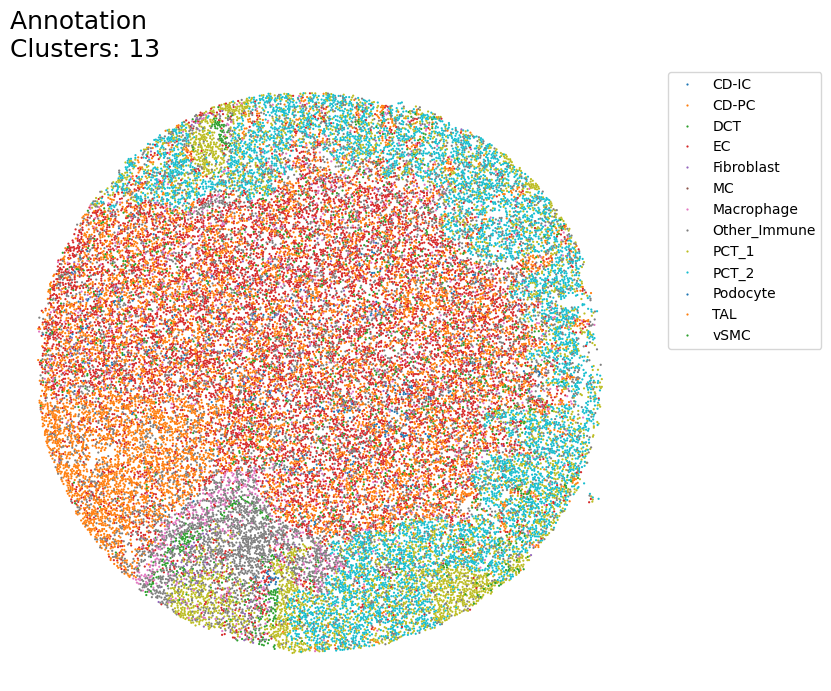

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_spatial(
        adata_st,
        annotation=adata_st.obs["author_cell_type"],
        # annotation=conf,
        spot_size=20,
        ax=ax,
        title=f"Annotation \nClusters: {len(set(adata_st.obs['author_cell_type']))}",
        palette=sns.color_palette("tab10", 13)
    )

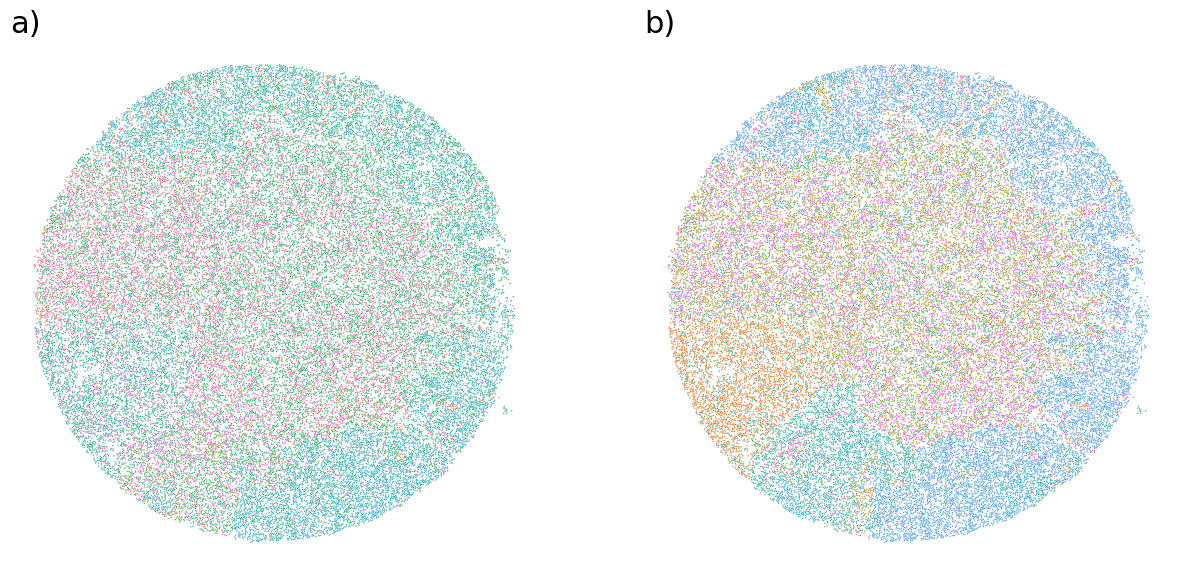

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
plot_spatial(
        adata_st,
        annotation=adata_st.obs['ctopt'],
        spot_size=8,
        ax=ax[0],
        title="a)",
        # palette=sns.color_palette("viridis", as_cmap=True)
    )

plot_spatial(
        adata_st,
        annotation=adata_st.obs['author_cell_type'],
        spot_size=8,
        ax=ax[1],
        title="b)",
        # palette=sns.color_palette("viridis", as_cmap=True)
    )

plt.savefig('figs/brainSS.png', dpi=300, bbox_inches='tight')
# plt.show()

In [11]:
adata_sc = sc.read_h5ad("/goofys/Samples/sc_reference/mouse_brain_L5_csr.h5ad")
adata_sc.var_names_make_unique()
adata_sc.obs_names_make_unique()
adata_sc

/home/nikola_dev/miniconda3/envs/ctopt2/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/nikola_dev/miniconda3/envs/ctopt2/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 160796 × 27998
    obs: 'cell_subclass', 'cell_class'

In [12]:
import scanpy as sc
adata_sc.layers["counts"] = adata_sc.X.copy()  # Used in contrastive learning
sc.pp.normalize_total(adata_sc, target_sum=1e4)
sc.pp.log1p(adata_sc)
sc.tl.rank_genes_groups(adata_sc, groupby="cell_subclass", use_raw=False)

/home/nikola_dev/miniconda3/envs/ctopt2/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/home/nikola_dev/miniconda3/envs/ctopt2/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/home/nikola_dev/miniconda3/envs/ctopt2/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.

In [13]:
adata_sc.X = adata_sc.layers["counts"]


In [16]:
adata_sc

AnnData object with n_obs × n_vars = 160796 × 27998
    obs: 'cell_subclass', 'cell_class'
    uns: 'log1p', 'rank_genes_groups'
    layers: 'counts'

In [18]:
adata_sc.write_h5ad("mouse_brain_L5_csr_mg.h5ad")